Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [1]:

import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        print('chao')
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        print('hola')
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
#       # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)

Lavanderia UPS
chao
chao
chao
chao
chao
hola
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
hola
Llega vehiculo: Vehiculo-6 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
hola
Llega vehiculo: Vehiculo-7 a la hora 0.00.
hola
Llega vehiculo: Vehiculo-8 a la hora 6.00.
hola
Llega vehiculo: Vehiculo-9 a la hora 7.00.
Removido  {74%} suciedad vehiculo => Vehiculo-3 
hola
Llega vehiculo: Vehiculo-10 a la hora 8.00.
Vehiculo [Vehiculo-3] lavado a las 8.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 8.00.
Removido  {61%} suciedad vehiculo => Vehiculo-1 
Vehiculo [Vehiculo-1] lavado a las 9.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 9.00.
hola
Llega vehiculo: Vehiculo-11 a la hora 10.00.
Remo

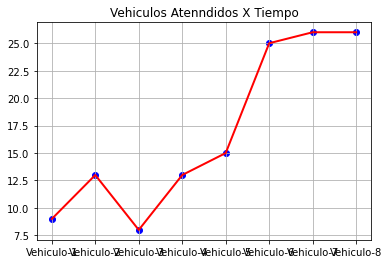

In [2]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Removido  {33%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Llega vehiculo: Furgoneta-3 a la hora 12.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {39%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
Lleg

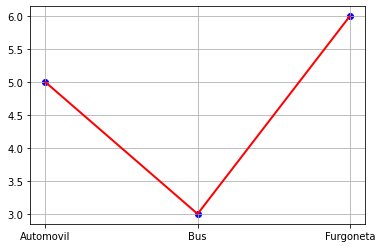

In [3]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportun

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

Finalmente generar las simulaciones para el pico de atencion de R0 calculado y R0 predecido la siguiente semana.
- infectados actual 390
- Media provincia Los Rios 145.5
- Mediana provincia Los Rios 150.28
- R0=3.316

Simulacion COVID 19
Llega nuevo paciente  :  0  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  1  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  2  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  3  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  4  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  5  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  6  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  7  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  8  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  9  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  10  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  11  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  12  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  13  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  14  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  15  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  16  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  17  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  18  tipo:  2  en tiempo: 0
Ll

Llega nuevo paciente  :  339  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  340  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  341  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  342  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  343  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  344  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  345  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  346  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  347  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  348  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  349  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  350  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  351  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  352  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  353  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  354  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  355  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  356  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  357  tipo:  3  en tie

	 El paciente  111 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  145 de tipo adulto  fue atendido en :  0.4771410779644727   en el hospital   A
	 El paciente  145 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  157 de tipo adulto mayor  fue atendido en :  0.4850219163829695   en el hospital   A
	 ee Al paciente:  157  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  113 de tipo niño  fue atendido en :  0.4886694606540442   en el hospital   B
	 El paciente  113 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  115 de tipo adulto mayor  fue atendido en :  0.4953959397274011   en el hospital   B
	 ee Al paciente:  115  se le asigna una CAMA   hospital  B
consultorio disponible en el hospital  B
El paciente  161 de tipo adolecente  fue atendido en :  0.4987059934673358   en el hospital   A
	 El paciente  161 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  109 de 

consultorio disponible en el hospital  A
El paciente  211 de tipo adolecente  fue atendido en :  0.6555513497729916   en el hospital   A
	 El paciente  211 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  147 de tipo adulto  fue atendido en :  0.6556364545091333   en el hospital   B
	 El paciente  147 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  148 de tipo adolecente  fue atendido en :  0.6588682762788614   en el hospital   B
	 El paciente  148 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  216 de tipo adulto mayor  fue atendido en :  0.6625901145884313   en el hospital   A
	 ee Al paciente:  216  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  214 de tipo adulto  fue atendido en :  0.6682037798393168   en el hospital   A
	 ee Al paciente:  214  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  151 de tipo adulto  fue atendido en :  0.6

Llega nuevo paciente  :  439  tipo:  1  en tiempo: 1
Llega nuevo paciente  :  440  tipo:  4  en tiempo: 1
Llega nuevo paciente  :  441  tipo:  3  en tiempo: 1
Llega nuevo paciente  :  442  tipo:  3  en tiempo: 1
Llega nuevo paciente  :  443  tipo:  2  en tiempo: 1
Llega nuevo paciente  :  444  tipo:  2  en tiempo: 1
Llega nuevo paciente  :  445  tipo:  4  en tiempo: 1
Llega nuevo paciente  :  446  tipo:  1  en tiempo: 1
Llega nuevo paciente  :  447  tipo:  3  en tiempo: 1
Llega nuevo paciente  :  448  tipo:  2  en tiempo: 1
Llega nuevo paciente  :  449  tipo:  2  en tiempo: 1
Llega nuevo paciente  :  450  tipo:  1  en tiempo: 1
Llega nuevo paciente  :  451  tipo:  3  en tiempo: 1
Llega nuevo paciente  :  452  tipo:  1  en tiempo: 1
Llega nuevo paciente  :  453  tipo:  4  en tiempo: 1
Llega nuevo paciente  :  454  tipo:  1  en tiempo: 1
Llega nuevo paciente  :  455  tipo:  4  en tiempo: 1
Llega nuevo paciente  :  456  tipo:  3  en tiempo: 1
Llega nuevo paciente  :  457  tipo:  3  en tie

Llega nuevo paciente  :  528  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  529  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  530  tipo:  2  en tiempo: 2
Llega nuevo paciente  :  531  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  532  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  533  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  534  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  535  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  536  tipo:  1  en tiempo: 2
Llega nuevo paciente  :  537  tipo:  1  en tiempo: 2
Llega nuevo paciente  :  538  tipo:  2  en tiempo: 2
Llega nuevo paciente  :  539  tipo:  2  en tiempo: 2
Llega nuevo paciente  :  540  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  541  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  542  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  543  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  544  tipo:  1  en tiempo: 2
Llega nuevo paciente  :  545  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  546  tipo:  3  en tie

El paciente  635 de tipo niño  fue atendido en :  0.6048271326558678   en el hospital   B
consultorio disponible en el hospital  B
El paciente  641 de tipo niño  fue atendido en :  0.6054288587338981   en el hospital   B
consultorio disponible en el hospital  B
El paciente  639 de tipo adulto mayor  fue atendido en :  0.6070987348284804   en el hospital   B
consultorio disponible en el hospital  B
El paciente  649 de tipo adulto mayor  fue atendido en :  0.6222589538333976   en el hospital   B
consultorio disponible en el hospital  B
El paciente  648 de tipo niño  fue atendido en :  0.6318236919390334   en el hospital   B
	 El paciente  648 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  650 de tipo adulto  fue atendido en :  0.6450860249198405   en el hospital   B
consultorio disponible en el hospital  B
El paciente  655 de tipo niño  fue atendido en :  0.6590377327950216   en el hospital   B
consultorio disponible en el hospital  B
El paciente  658 de tipo niño 

El paciente  787 de tipo adulto  fue atendido en :  0.4028142788254061   en el hospital   A
	 El paciente  787 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  786 de tipo adulto  fue atendido en :  0.40600281334083066   en el hospital   A
	 El paciente  786 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  755 de tipo adolecente  fue atendido en :  0.40623582701619476   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  601  en el hospital  B  espero  1.4074683014350704  dias y fallece no hay camas
El paciente  756 de tipo adolecente  fue atendido en :  0.40759543318988767   en el hospital   B
consultorio disponible en el hospital  B
El paciente  794 de tipo niño  fue atendido en :  0.4108615013427719   en el hospital   A
consultorio disponible en el hospital  A
El paciente  795 de tipo niño  fue atendido en :  0.4141969034812343   en el hospital   A
El paciente  788 de tipo adulto  fue atendido en :  0.41498128845819

El paciente  910 de tipo adulto mayor  fue atendido en :  0.2708024501453288   en el hospital   A
	 El paciente  910 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  845 de tipo adolecente  fue atendido en :  0.2731853723122821   en el hospital   B
consultorio disponible en el hospital  B
El paciente  908 de tipo adulto  fue atendido en :  0.27508865293436724   en el hospital   A
	 El paciente  908 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  914 de tipo adulto mayor  fue atendido en :  0.2783587682250621   en el hospital   A
consultorio disponible en el hospital  A
El paciente  912 de tipo adolecente  fue atendido en :  0.27896677489356936   en el hospital   A
consultorio disponible en el hospital  A
El paciente  846 de tipo niño  fue atendido en :  0.280119617112776   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  447  en el hospital  B  espero  3.2814803486176745  dias y fallece no hay camas
El paciente  84

El paciente  889 de tipo adolecente  fue atendido en :  0.5594002519014287   en el hospital   B
consultorio disponible en el hospital  B
El paciente  890 de tipo adolecente  fue atendido en :  0.5656166699740224   en el hospital   B
consultorio disponible en el hospital  B
El paciente  891 de tipo adulto mayor  fue atendido en :  0.5741030893930761   en el hospital   B
	 El paciente  891 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  893 de tipo adulto mayor  fue atendido en :  0.5773552013143428   en el hospital   B
consultorio disponible en el hospital  B
El paciente  896 de tipo niño  fue atendido en :  0.5869835379927055   en el hospital   B
	 El paciente  896 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  897 de tipo adulto mayor  fue atendido en :  0.5970972668447319   en el hospital   B
consultorio disponible en el hospital  B
El paciente  899 de tipo niño  fue atendido en :  0.6104344940627131   en el hospital   B
	 El paciente  899

	 ew El paciente  835  en el hospital  A  espero  1.1058120236316666  dias y fallece no hay camas
	 ew El paciente  410  en el hospital  A  espero  4.10597433493303  dias y fallece no hay camas
El paciente  951 de tipo adolecente  fue atendido en :  0.10655972045028772   en el hospital   B
	 El paciente  951 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  557  en el hospital  A  espero  3.1086401243856976  dias y fallece no hay camas
El paciente  984 de tipo adolecente  fue atendido en :  0.10929183835676781   en el hospital   A
consultorio disponible en el hospital  A
El paciente  982 de tipo adulto  fue atendido en :  0.1123042956286513   en el hospital   A
	 El paciente  982 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  987 de tipo adolecente  fue atendido en :  0.11231783290845243   en el hospital   A
consultorio disponible en el hospital  A
El paciente  988 de tipo adolecente  fue atendido en :  0.11358458297002016   en el hospita

El paciente  1061 de tipo adulto mayor  fue atendido en :  0.3640275135239355   en el hospital   A
	 El paciente  1061 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  996 de tipo adolecente  fue atendido en :  0.36645709982405705   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1062 de tipo adulto mayor  fue atendido en :  0.36683490750723013   en el hospital   A
	 El paciente  1062 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1003 de tipo niño  fue atendido en :  0.37299793908607626   en el hospital   B
	 El paciente  1003 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1002 de tipo niño  fue atendido en :  0.37383347437509507   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1005 de tipo adulto mayor  fue atendido en :  0.38372518749927664   en el hospital   B
	 El paciente  1005 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1065 de tipo adul

Llega nuevo paciente  :  1167  tipo:  4  en tiempo: 6
Llega nuevo paciente  :  1168  tipo:  1  en tiempo: 6
Llega nuevo paciente  :  1169  tipo:  4  en tiempo: 6
Llega nuevo paciente  :  1170  tipo:  3  en tiempo: 6
Llega nuevo paciente  :  1171  tipo:  2  en tiempo: 6
Llega nuevo paciente  :  1172  tipo:  2  en tiempo: 6
Llega nuevo paciente  :  1173  tipo:  2  en tiempo: 6
Llega nuevo paciente  :  1174  tipo:  3  en tiempo: 6
Llega nuevo paciente  :  1175  tipo:  2  en tiempo: 6
Llega nuevo paciente  :  1176  tipo:  3  en tiempo: 6
Llega nuevo paciente  :  1177  tipo:  2  en tiempo: 6
Llega nuevo paciente  :  1178  tipo:  4  en tiempo: 6
Llega nuevo paciente  :  1179  tipo:  1  en tiempo: 6
Llega nuevo paciente  :  1180  tipo:  1  en tiempo: 6
Llega nuevo paciente  :  1181  tipo:  3  en tiempo: 6
Llega nuevo paciente  :  1182  tipo:  1  en tiempo: 6
Llega nuevo paciente  :  1183  tipo:  2  en tiempo: 6
Llega nuevo paciente  :  1184  tipo:  1  en tiempo: 6
Llega nuevo paciente  :  118

El paciente  1120 de tipo niño  fue atendido en :  0.14331511351039872   en el hospital   B
	 El paciente  1120 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1110 de tipo adulto mayor  fue atendido en :  0.14453103474630424   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  709  en el hospital  A  espero  3.145624997280126  dias y fallece no hay camas
	 ew El paciente  829  en el hospital  B  espero  2.1506707546157413  dias y fallece no hay camas
El paciente  1109 de tipo adolecente  fue atendido en :  0.1527526046222567   en el hospital   A
	 El paciente  1109 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1111 de tipo adulto mayor  fue atendido en :  0.15456757366649576   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1116 de tipo adulto mayor  fue atendido en :  0.15932568198971975   en el hospital   A
	 El paciente  1116 no tiene COVID.
consultorio disponible en el hospital  A
El 

El paciente  1206 de tipo niño  fue atendido en :  0.5807370878189637   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1205 de tipo adulto  fue atendido en :  0.5848054924708688   en el hospital   B
	 El paciente  1205 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1196 de tipo adulto  fue atendido en :  0.5881611835409979   en el hospital   B
	 ew El paciente  783  en el hospital  B  espero  3.595692005522235  dias y fallece no hay camas
El paciente  1209 de tipo niño  fue atendido en :  0.6033109394871969   en el hospital   B
	 El paciente  1209 no tiene COVID.
	 ew El paciente  641  en el hospital  B  espero  4.605428858733898  dias y fallece no hay camas
El paciente  1212 de tipo niño  fue atendido en :  0.6114337938940553   en el hospital   B
	 ew El paciente  1063  en el hospital  B  espero  1.6393980311563814  dias y fallece no hay camas
El paciente se termino de atender:  212  tiempo de salida:  6.6452808825135525  hospital  A
	 

	 ew El paciente  1064  en el hospital  A  espero  2.3600676276529313  dias y fallece no hay camas
	 ew El paciente  1184  en el hospital  A  espero  1.3614947129389865  dias y fallece no hay camas
El paciente  1295 de tipo adulto mayor  fue atendido en :  0.366607686551804   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  863  en el hospital  B  espero  3.3681280234398425  dias y fallece no hay camas
El paciente  1314 de tipo adolecente  fue atendido en :  0.371925064966252   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1297 de tipo niño  fue atendido en :  0.3731274225778973   en el hospital   B
	 El paciente  1297 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  1002  en el hospital  B  espero  2.373833474375095  dias y fallece no hay camas
El paciente  1323 de tipo adulto mayor  fue atendido en :  0.37838044004775817   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1316 de 

El paciente se termino de atender:  256  tiempo de salida:  7.755948864508998  hospital  A
	 ee Al paciente:  763  se le asigna una CAMA   hospital  A
El paciente se termino de atender:  189  tiempo de salida:  7.870976279769268  hospital  B
	 ee Al paciente:  697  se le asigna una CAMA   hospital  B
siguente dia 8
Llega nuevo paciente  :  1350  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1351  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1352  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1353  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1354  tipo:  1  en tiempo: 8
Llega nuevo paciente  :  1355  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1356  tipo:  1  en tiempo: 8
Llega nuevo paciente  :  1357  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1358  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1359  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1360  tipo:  3  en tiempo: 8
Llega nuevo paciente  :  1361  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1362  tipo

consultorio disponible en el hospital  A
El paciente  1407 de tipo adulto mayor  fue atendido en :  0.1675025414400615   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1409 de tipo niño  fue atendido en :  0.1713473606840843   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  1000  en el hospital  A  espero  3.1718619107553874  dias y fallece no hay camas
El paciente  1381 de tipo adulto mayor  fue atendido en :  0.17508835270720624   en el hospital   B
	 El paciente  1381 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1408 de tipo adulto mayor  fue atendido en :  0.17637770475465153   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  1008  en el hospital  A  espero  3.1807642107650036  dias y fallece no hay camas
El paciente  1418 de tipo niño  fue atendido en :  0.1854302195259656   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1415 de tipo adulto mayor 

El paciente  1416 de tipo adolecente  fue atendido en :  0.34812186599875616   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1417 de tipo niño  fue atendido en :  0.3519572403181783   en el hospital   B
	 El paciente  1417 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  1292  en el hospital  B  espero  1.3541937597193723  dias y fallece no hay camas
	 ew El paciente  1293  en el hospital  B  espero  1.3579693896331761  dias y fallece no hay camas
	 ew El paciente  861  en el hospital  B  espero  4.359204221703903  dias y fallece no hay camas
	 ew El paciente  935  en el hospital  A  espero  4.36027538493976  dias y fallece no hay camas
El paciente se termino de atender:  104  tiempo de salida:  8.362302945333244  hospital  A
	 ee Al paciente:  934  se le asigna una CAMA   hospital  A
El paciente  1484 de tipo niño  fue atendido en :  0.3647518895307975   en el hospital   A
	 ew El paciente  996  en el hospital  B  espero  3.36645709

Llega nuevo paciente  :  1600  tipo:  4  en tiempo: 9
Llega nuevo paciente  :  1601  tipo:  3  en tiempo: 9
Llega nuevo paciente  :  1602  tipo:  3  en tiempo: 9
Llega nuevo paciente  :  1603  tipo:  3  en tiempo: 9
Llega nuevo paciente  :  1604  tipo:  3  en tiempo: 9
Llega nuevo paciente  :  1605  tipo:  2  en tiempo: 9
Llega nuevo paciente  :  1606  tipo:  1  en tiempo: 9
Llega nuevo paciente  :  1607  tipo:  2  en tiempo: 9
Llega nuevo paciente  :  1608  tipo:  4  en tiempo: 9
Llega nuevo paciente  :  1609  tipo:  4  en tiempo: 9
Llega nuevo paciente  :  1610  tipo:  4  en tiempo: 9
Llega nuevo paciente  :  1611  tipo:  3  en tiempo: 9
Llega nuevo paciente  :  1612  tipo:  3  en tiempo: 9
Llega nuevo paciente  :  1613  tipo:  4  en tiempo: 9
Llega nuevo paciente  :  1614  tipo:  4  en tiempo: 9
Llega nuevo paciente  :  1615  tipo:  2  en tiempo: 9
Llega nuevo paciente  :  1616  tipo:  2  en tiempo: 9
Llega nuevo paciente  :  1617  tipo:  4  en tiempo: 9
Llega nuevo paciente  :  161

El paciente se termino de atender:  43  tiempo de salida:  9.146065145632413  hospital  A
	 ee Al paciente:  984  se le asigna una CAMA   hospital  A
	 ew El paciente  1251  en el hospital  A  espero  2.1463566537634478  dias y fallece no hay camas
El paciente  1520 de tipo adulto  fue atendido en :  0.1506714239784035   en el hospital   B
	 El paciente  1520 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1516 de tipo adolecente  fue atendido en :  0.15194491103313545   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  1111  en el hospital  A  espero  3.1545675736664958  dias y fallece no hay camas
El paciente  1527 de tipo adulto mayor  fue atendido en :  0.15578413783781286   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1524 de tipo adolecente  fue atendido en :  0.16041469502233063   en el hospital   A
	 El paciente  1524 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  1246  en 

El paciente  1620 de tipo niño  fue atendido en :  0.613192394791577   en el hospital   B
	 El paciente  1620 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  1455  en el hospital  B  espero  1.6309603913690243  dias y fallece no hay camas
El paciente  1622 de tipo niño  fue atendido en :  0.6358329214758474   en el hospital   B
El paciente  1621 de tipo adulto  fue atendido en :  0.6362752379376104   en el hospital   B
	 El paciente  1621 no tiene COVID.
El paciente  1623 de tipo adolecente  fue atendido en :  0.6460710129142662   en el hospital   B
	 El paciente  1623 no tiene COVID.
El paciente se termino de atender:  156  tiempo de salida:  9.689964209331258  hospital  B
	 ee Al paciente:  969  se le asigna una CAMA   hospital  B
El paciente se termino de atender:  222  tiempo de salida:  9.697543515321225  hospital  A
	 ee Al paciente:  1001  se le asigna una CAMA   hospital  A
El paciente se termino de atender:  163  tiempo de salida:  9.75193268483965  

	 ew El paciente  1576  en el hospital  A  espero  1.3239820379820806  dias y fallece no hay camas
El paciente  1687 de tipo adolecente  fue atendido en :  0.32569801312102875   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1689 de tipo adulto mayor  fue atendido en :  0.3260597332438149   en el hospital   B
	 El paciente  1689 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1724 de tipo adolecente  fue atendido en :  0.32705854566813386   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1732 de tipo niño  fue atendido en :  0.3279499999619446   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1728 de tipo adolecente  fue atendido en :  0.33235292142551565   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  1162  en el hospital  A  espero  4.332611335794017  dias y fallece no hay camas
	 ew El paciente  1477  en el hospital  A  espero  2.3351844111394726  dias y 

	 ew El paciente  1059  en el hospital  B  espero  5.592643991082225  dias y fallece no hay camas
El paciente  1739 de tipo adulto  fue atendido en :  0.5949300728778422   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1751 de tipo adulto mayor  fue atendido en :  0.6152285042163665   en el hospital   B
	 El paciente  1751 no tiene COVID.
consultorio disponible en el hospital  B
El paciente se termino de atender:  195  tiempo de salida:  10.620005430497358  hospital  A
	 ee Al paciente:  1113  se le asigna una CAMA   hospital  A
El paciente  1750 de tipo adolecente  fue atendido en :  0.6229315380434759   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  1067  en el hospital  B  espero  5.62794864342542  dias y fallece no hay camas
El paciente  1748 de tipo adulto  fue atendido en :  0.6292185273693232   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1757 de tipo niño  fue atendido en :  0.6375179392616843 

El paciente  1804 de tipo adulto mayor  fue atendido en :  0.12467490032349993   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  1515  en el hospital  A  espero  2.1259056484553263  dias y fallece no hay camas
El paciente  1802 de tipo adolecente  fue atendido en :  0.12711114451671257   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1803 de tipo adolecente  fue atendido en :  0.13099564423064436   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1799 de tipo adulto  fue atendido en :  0.13225914110518566   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  1392  en el hospital  A  espero  3.135988723251071  dias y fallece no hay camas
El paciente  1787 de tipo adulto mayor  fue atendido en :  0.14102878346874625   en el hospital   B
	 El paciente  1787 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1785 de tipo adulto mayor  fue atendido en :  0.14344458093

El paciente  1829 de tipo adulto mayor  fue atendido en :  0.33373484656815045   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1828 de tipo niño  fue atendido en :  0.33426206119725954   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1874 de tipo niño  fue atendido en :  0.3360152540295136   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1875 de tipo adolecente  fue atendido en :  0.3371797135745904   en el hospital   A
	 El paciente  1875 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  1311  en el hospital  A  espero  4.337954507737974  dias y fallece no hay camas
	 ew El paciente  1470  en el hospital  A  espero  3.3388825825656863  dias y fallece no hay camas
El paciente se termino de atender:  100  tiempo de salida:  11.3401221127455  hospital  A
	 ee Al paciente:  1264  se le asigna una CAMA   hospital  A
El paciente  1878 de tipo adolecente  fue atendido en :  0.3452717764496

Llega nuevo paciente  :  2008  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2009  tipo:  1  en tiempo: 12
Llega nuevo paciente  :  2010  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2011  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2012  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2013  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2014  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2015  tipo:  1  en tiempo: 12
Llega nuevo paciente  :  2016  tipo:  2  en tiempo: 12
Llega nuevo paciente  :  2017  tipo:  2  en tiempo: 12
Llega nuevo paciente  :  2018  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2019  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2020  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2021  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2022  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2023  tipo:  1  en tiempo: 12
Llega nuevo paciente  :  2024  tipo:  2  en tiempo: 12
Llega nuevo paciente  :  2025  tipo:  1  en tiempo: 12
Llega nuev

El paciente  2016 de tipo adolecente  fue atendido en :  0.5727513735844312   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2017 de tipo adolecente  fue atendido en :  0.5773532249587401   en el hospital   B
consultorio disponible en el hospital  B
El paciente se termino de atender:  133  tiempo de salida:  12.59262421995542  hospital  B
	 ee Al paciente:  1348  se le asigna una CAMA   hospital  B
	 ew El paciente  1739  en el hospital  B  espero  2.594930072877842  dias y fallece no hay camas
El paciente  2020 de tipo adulto mayor  fue atendido en :  0.5962050610442571   en el hospital   B
	 El paciente  2020 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2022 de tipo adulto mayor  fue atendido en :  0.6050680350861732   en el hospital   B
	 El paciente  2022 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  1896  en el hospital  B  espero  1.6093271497097401  dias y fallece no hay camas
El paciente  2023 de ti

El paciente  2122 de tipo adulto mayor  fue atendido en :  0.2616308679633157   en el hospital   A
	 El paciente  2122 no tiene COVID.
consultorio disponible en el hospital  A
El paciente se termino de atender:  71  tiempo de salida:  13.26530849646448  hospital  B
	 ee Al paciente:  1451  se le asigna una CAMA   hospital  B
	 ew El paciente  1953  en el hospital  B  espero  1.2660137527748443  dias y fallece no hay camas
El paciente  2089 de tipo adulto mayor  fue atendido en :  0.27011060294436184   en el hospital   B
	 El paciente  2089 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2087 de tipo adolecente  fue atendido en :  0.2726025905162768   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2124 de tipo niño  fue atendido en :  0.27357294378775343   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2119 de tipo adulto  fue atendido en :  0.2760374293615495   en el hospital   A
consultorio disponible en el hosp

	 ew El paciente  1886  en el hospital  B  espero  2.538010664872692  dias y fallece no hay camas
El paciente  2136 de tipo niño  fue atendido en :  0.5516883515834792   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2133 de tipo adulto  fue atendido en :  0.5590339755884273   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2137 de tipo adulto mayor  fue atendido en :  0.5596238438705932   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  1606  en el hospital  B  espero  4.560860986910752  dias y fallece no hay camas
El paciente  2141 de tipo adulto mayor  fue atendido en :  0.5860695933100359   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2139 de tipo adulto  fue atendido en :  0.5997751775793407   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2144 de tipo niño  fue atendido en :  0.6016096548927639   en el hospital   B
consultorio disponible en el hosp

El paciente  2187 de tipo adulto mayor  fue atendido en :  0.08246190104474849   en el hospital   B
	 El paciente  2187 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  1776  en el hospital  B  espero  3.085270542235248  dias y fallece no hay camas
El paciente  2189 de tipo adolecente  fue atendido en :  0.08822627312530074   en el hospital   A
	 El paciente  2189 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2193 de tipo adulto mayor  fue atendido en :  0.08900862756850891   en el hospital   A
	 El paciente  2193 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2192 de tipo niño  fue atendido en :  0.0902984221511467   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2065  en el hospital  A  espero  1.0912391895966564  dias y fallece no hay camas
	 ew El paciente  1635  en el hospital  B  espero  4.09358704939752  dias y fallece no hay camas
El paciente  2195 de tipo niño  fue atendido 

El paciente  2261 de tipo niño  fue atendido en :  0.39756245638053045   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2294 de tipo adulto mayor  fue atendido en :  0.3976286205902291   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2262 de tipo niño  fue atendido en :  0.398730690889316   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2264 de tipo niño  fue atendido en :  0.4043194114495101   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  1760  en el hospital  A  espero  4.408484672324953  dias y fallece no hay camas
El paciente se termino de atender:  128  tiempo de salida:  14.409390435410433  hospital  A
	 ee Al paciente:  1754  se le asigna una CAMA   hospital  A
	 ew El paciente  1980  en el hospital  B  espero  2.409685754562094  dias y fallece no hay camas
El paciente  2297 de tipo niño  fue atendido en :  0.410190118462717   en el hospital   A
consultorio disponible en

Llega nuevo paciente  :  2380  tipo:  2  en tiempo: 15
Llega nuevo paciente  :  2381  tipo:  4  en tiempo: 15
Llega nuevo paciente  :  2382  tipo:  4  en tiempo: 15
Llega nuevo paciente  :  2383  tipo:  1  en tiempo: 15
Llega nuevo paciente  :  2384  tipo:  3  en tiempo: 15
Llega nuevo paciente  :  2385  tipo:  3  en tiempo: 15
Llega nuevo paciente  :  2386  tipo:  3  en tiempo: 15
Llega nuevo paciente  :  2387  tipo:  3  en tiempo: 15
Llega nuevo paciente  :  2388  tipo:  1  en tiempo: 15
Llega nuevo paciente  :  2389  tipo:  2  en tiempo: 15
Llega nuevo paciente  :  2390  tipo:  4  en tiempo: 15
Llega nuevo paciente  :  2391  tipo:  2  en tiempo: 15
Llega nuevo paciente  :  2392  tipo:  3  en tiempo: 15
Llega nuevo paciente  :  2393  tipo:  1  en tiempo: 15
Llega nuevo paciente  :  2394  tipo:  4  en tiempo: 15
Llega nuevo paciente  :  2395  tipo:  3  en tiempo: 15
Llega nuevo paciente  :  2396  tipo:  1  en tiempo: 15
Llega nuevo paciente  :  2397  tipo:  2  en tiempo: 15
Llega nuev

El paciente  2426 de tipo adulto  fue atendido en :  0.4408114688053555   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2411 de tipo adulto mayor  fue atendido en :  0.4477977050669022   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2434 de tipo niño  fue atendido en :  0.4491363218384983   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2410 de tipo adolecente  fue atendido en :  0.45773811719006297   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2435 de tipo adolecente  fue atendido en :  0.4628180881121988   en el hospital   A
	 El paciente  2435 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2415 de tipo niño  fue atendido en :  0.46477659375709024   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2437 de tipo adolecente  fue atendido en :  0.46488786000808346   en el hospital   A
	 El paciente  2437 no tiene COVID.
consultorio di

Llega nuevo paciente  :  2479  tipo:  4  en tiempo: 16
Llega nuevo paciente  :  2480  tipo:  2  en tiempo: 16
Llega nuevo paciente  :  2481  tipo:  3  en tiempo: 16
Llega nuevo paciente  :  2482  tipo:  4  en tiempo: 16
Llega nuevo paciente  :  2483  tipo:  3  en tiempo: 16
Llega nuevo paciente  :  2484  tipo:  1  en tiempo: 16
Llega nuevo paciente  :  2485  tipo:  4  en tiempo: 16
Llega nuevo paciente  :  2486  tipo:  2  en tiempo: 16
Llega nuevo paciente  :  2487  tipo:  2  en tiempo: 16
Llega nuevo paciente  :  2488  tipo:  3  en tiempo: 16
Llega nuevo paciente  :  2489  tipo:  1  en tiempo: 16
Llega nuevo paciente  :  2490  tipo:  1  en tiempo: 16
Llega nuevo paciente  :  2491  tipo:  2  en tiempo: 16
Llega nuevo paciente  :  2492  tipo:  4  en tiempo: 16
Llega nuevo paciente  :  2493  tipo:  4  en tiempo: 16
Llega nuevo paciente  :  2494  tipo:  2  en tiempo: 16
Llega nuevo paciente  :  2495  tipo:  2  en tiempo: 16
Llega nuevo paciente  :  2496  tipo:  3  en tiempo: 16
Llega nuev

El paciente  2501 de tipo adulto  fue atendido en :  0.18360522117247768   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2504 de tipo adolecente  fue atendido en :  0.1842922418669808   en el hospital   A
	 El paciente  2504 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  2216  en el hospital  B  espero  2.1891021861249556  dias y fallece no hay camas
El paciente  2507 de tipo niño  fue atendido en :  0.18976073215376132   en el hospital   A
	 El paciente  2507 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  2228  en el hospital  A  espero  2.1958221177593487  dias y fallece no hay camas
	 ew El paciente  2231  en el hospital  A  espero  2.200270741084779  dias y fallece no hay camas
El paciente  2512 de tipo niño  fue atendido en :  0.2012671399458128   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2506 de tipo adulto  fue atendido en :  0.20190862542442645   en el hospital   A


El paciente  2556 de tipo adulto mayor  fue atendido en :  0.36504975072582013   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2555 de tipo niño  fue atendido en :  0.3669693655683943   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2287  en el hospital  A  espero  2.37027813756659  dias y fallece no hay camas
	 ew El paciente  1968  en el hospital  B  espero  4.3705623195828025  dias y fallece no hay camas
El paciente  2553 de tipo adulto  fue atendido en :  0.37716012973086777   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2560 de tipo adulto mayor  fue atendido en :  0.37763875073352793   en el hospital   A
	 El paciente  2560 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2518 de tipo adulto  fue atendido en :  0.3795504312939535   en el hospital   B
	 El paciente  2518 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2258  en el hospital  B  espero

Llega nuevo paciente  :  2706  tipo:  4  en tiempo: 17
Llega nuevo paciente  :  2707  tipo:  1  en tiempo: 17
Llega nuevo paciente  :  2708  tipo:  4  en tiempo: 17
Llega nuevo paciente  :  2709  tipo:  2  en tiempo: 17
Llega nuevo paciente  :  2710  tipo:  4  en tiempo: 17
Llega nuevo paciente  :  2711  tipo:  4  en tiempo: 17
Llega nuevo paciente  :  2712  tipo:  2  en tiempo: 17
Llega nuevo paciente  :  2713  tipo:  1  en tiempo: 17
Llega nuevo paciente  :  2714  tipo:  3  en tiempo: 17
Llega nuevo paciente  :  2715  tipo:  3  en tiempo: 17
Llega nuevo paciente  :  2716  tipo:  4  en tiempo: 17
Llega nuevo paciente  :  2717  tipo:  1  en tiempo: 17
Llega nuevo paciente  :  2718  tipo:  4  en tiempo: 17
Llega nuevo paciente  :  2719  tipo:  2  en tiempo: 17
consultorio disponible en el hospital  B
consultorio disponible en el hospital  A
consultorio disponible en el hospital  B
consultorio disponible en el hospital  B
consultorio disponible en el hospital  A
consultorio disponible en

El paciente  2624 de tipo niño  fue atendido en :  0.1995891019918119   en el hospital   B
	 El paciente  2624 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2218  en el hospital  B  espero  3.2037083991318944  dias y fallece no hay camas
El paciente  2649 de tipo adolecente  fue atendido en :  0.2092987393234509   en el hospital   A
	 El paciente  2649 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2650 de tipo adolecente  fue atendido en :  0.21055660899370565   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2364  en el hospital  A  espero  2.2108687108137133  dias y fallece no hay camas
El paciente  2626 de tipo adulto mayor  fue atendido en :  0.21647688431490764   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2655 de tipo adulto  fue atendido en :  0.22437242601179364   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2661 de tipo adulto mayor  fue a

consultorio disponible en el hospital  B
El paciente se termino de atender:  1358  tiempo de salida:  17.676192894224783  hospital  B
	 ee Al paciente:  2085  se le asigna una CAMA   hospital  B
El paciente  2713 de tipo niño  fue atendido en :  0.6883285617895503   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2717 de tipo niño  fue atendido en :  0.6922418086192579   en el hospital   B
El paciente  2718 de tipo adulto mayor  fue atendido en :  0.6945749457033799   en el hospital   B
El paciente  2719 de tipo adolecente  fue atendido en :  0.7221436139773232   en el hospital   B
	 El paciente  2719 no tiene COVID.
El paciente se termino de atender:  445  tiempo de salida:  17.73418925276637  hospital  B
	 ee Al paciente:  2097  se le asigna una CAMA   hospital  B
	 ew El paciente  2168  en el hospital  B  espero  4.749860119057139  dias y fallece no hay camas
	 ew El paciente  2170  en el hospital  B  espero  4.754275309996501  dias y fallece no hay camas
El

El paciente se termino de atender:  1149  tiempo de salida:  18.238251275938442  hospital  B
	 ee Al paciente:  2126  se le asigna una CAMA   hospital  B
El paciente  2797 de tipo adulto mayor  fue atendido en :  0.24152638802107163   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2769 de tipo niño  fue atendido en :  0.2452871262969758   en el hospital   B
	 El paciente  2769 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2633  en el hospital  B  espero  1.252782188249995  dias y fallece no hay camas
	 ew El paciente  2483  en el hospital  B  espero  2.253640712755111  dias y fallece no hay camas
El paciente  2770 de tipo niño  fue atendido en :  0.25756006512870755   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2798 de tipo adulto  fue atendido en :  0.2586614591507299   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2801 de tipo adolecente  fue atendido en :  0.259782944857935

	 ew El paciente  2395  en el hospital  B  espero  3.4058320709195016  dias y fallece no hay camas
El paciente  2802 de tipo niño  fue atendido en :  0.4081818083049349   en el hospital   B
	 El paciente  2802 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2658  en el hospital  B  espero  1.4087520413520593  dias y fallece no hay camas
El paciente  2800 de tipo niño  fue atendido en :  0.40947042819738044   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2837 de tipo adulto  fue atendido en :  0.41024437443638817   en el hospital   A
	 El paciente  2837 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2803 de tipo niño  fue atendido en :  0.41079540462758857   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2842 de tipo adolecente  fue atendido en :  0.4114411549456989   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2404  en el hospital  B  espero  3.417276

Llega nuevo paciente  :  2991  tipo:  1  en tiempo: 19
Llega nuevo paciente  :  2992  tipo:  1  en tiempo: 19
Llega nuevo paciente  :  2993  tipo:  4  en tiempo: 19
consultorio disponible en el hospital  A
consultorio disponible en el hospital  A
consultorio disponible en el hospital  A
consultorio disponible en el hospital  B
consultorio disponible en el hospital  B
consultorio disponible en el hospital  B
consultorio disponible en el hospital  A
consultorio disponible en el hospital  A
	 ew El paciente  2317  en el hospital  B  espero  4.015313940296679  dias y fallece no hay camas
El paciente  2861 de tipo adulto mayor  fue atendido en :  0.015776197267751257   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2859 de tipo adulto mayor  fue atendido en :  0.01770197806268925   en el hospital   A
	 El paciente  2859 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2865 de tipo niño  fue atendido en :  0.01891206176666671   en el hospital   

consultorio disponible en el hospital  A
	 ew El paciente  2781  en el hospital  A  espero  1.1921266415442062  dias y fallece no hay camas
El paciente  2922 de tipo adulto  fue atendido en :  0.19647392561251564   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2365  en el hospital  A  espero  4.2022865004801275  dias y fallece no hay camas
El paciente  2884 de tipo adulto  fue atendido en :  0.20334038693805567   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2928 de tipo adolecente  fue atendido en :  0.20579170278005066   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2760  en el hospital  B  espero  1.2061726982222254  dias y fallece no hay camas
El paciente  2888 de tipo adulto mayor  fue atendido en :  0.20801070924707687   en el hospital   B
	 El paciente  2888 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2890 de tipo adolecente  fue atendido en :  0.2080402455680712 

	 ee Al paciente:  2341  se le asigna una CAMA   hospital  B
El paciente se termino de atender:  528  tiempo de salida:  19.718969095043388  hospital  A
	 ee Al paciente:  2423  se le asigna una CAMA   hospital  A
El paciente  2989 de tipo niño  fue atendido en :  0.7214616323515486   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2988 de tipo adolecente  fue atendido en :  0.7245756518731561   en el hospital   B
	 El paciente  2988 no tiene COVID.
El paciente  2990 de tipo adolecente  fue atendido en :  0.7458106488655147   en el hospital   B
	 El paciente  2990 no tiene COVID.
El paciente  2991 de tipo niño  fue atendido en :  0.7491672853636118   en el hospital   B
	 El paciente  2991 no tiene COVID.
El paciente se termino de atender:  980  tiempo de salida:  19.75193268483965  hospital  B
	 ee Al paciente:  2357  se le asigna una CAMA   hospital  B
El paciente se termino de atender:  1369  tiempo de salida:  19.787206082872586  hospital  B
	 ee Al paciente

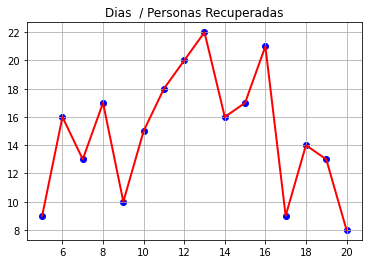

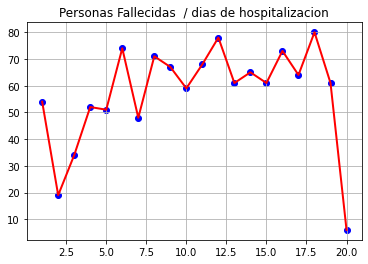

Resultados pacientes :
Recuperados: 
{5: 9, 6: 16, 7: 13, 8: 17, 9: 10, 10: 15, 11: 18, 12: 20, 13: 22, 14: 16, 15: 17, 16: 21, 17: 9, 18: 14, 19: 13, 20: 8}
Fallecidos: 
{1: 54, 2: 19, 3: 34, 4: 52, 5: 51, 6: 74, 7: 48, 8: 71, 9: 67, 10: 59, 11: 68, 12: 78, 13: 61, 14: 65, 15: 61, 16: 73, 17: 64, 18: 80, 19: 61, 20: 6}
Tiempo promedio total que requiere un paciente para ser atendido desde cero. 11.06641228988557
total pacientes atendidos 2886
total pacientes sin atender 107 los cuales pudieron morir y estan contabilizados conjunto con muertos
total pacientes muertos 1146


In [9]:
import simpy 
import random
import numpy as np

import matplotlib.pyplot as pp
%matplotlib inline

#PARAMETROS
HOSPITALES=2
TASA_CRECIMIENTO=137
INFECTADOS=390
HOSPITAL_CAMA_A=106 #HOSPITAL MARTIN ICAZA 106 total ocupadas regularmente 71
HOSPITAL_CAMA_B=71 #Hospital Cantonal Sagrado Corazón de Jesús
CONSULTORIO_HOSPITAL_A=5
CONSULTORIO_HOSPITAL_B=3
DIAS_SIMULACION = 20
DIAS_INTERNADO = 10

#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}
# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}
personas_atendidas=[]
personas_sin_atender=[]
tiempoatencion=[]

class Hospital(object):
    def __init__(self,env,num_cama,name,num_consultorio):
        self.env=env
        self.num_cama=num_cama
        self.camas=simpy.Resource(env,num_cama)
        self.consultorio=simpy.Resource(env,num_consultorio)
        self.name=name
        #self.tiempo_llegada=tiempo_llegada
        
    def triaje(self,paciente,tipo,tiempo):
        print('consultorio disponible en el hospital ',self.name)
       # tiempo[paciente] = env.now
        tipo_paciente=""
        if(tipo==1):
            tipo_paciente='niño'
            #print('llega niño')
            yield self.env.timeout(random.uniform(0.015, 0.030) ) #tiempo de espera por la sala
           # tiempo_sala1.append(self.env.now-tiempo[paciente])
        elif(tipo == 2):
            tipo_paciente='adolecente'
            #print('llega adolecente')
            yield self.env.timeout(random.uniform(0.025, 0.040) )
        elif(tipo == 3):
            tipo_paciente='adulto'
            #print('llega adulto')
            yield self.env.timeout(random.uniform(0.030, 0.055) )
        else:
            tipo_paciente='adulto mayor'
            #print('llega tercera edad')
            yield self.env.timeout(random.uniform(0.015, 0.030) )
            
        print("El paciente ", paciente, 'de tipo',tipo_paciente," fue atendido en : ", self.env.now-tiempo[paciente], "  en el hospital  ", self.name)
        
    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        tiempoatencion.append(tiempo[paciente]-self.env.now)
        print("El paciente se termino de atender: ", paciente, " tiempo de salida: ", self.env.now, " hospital ", self.name)


    
    
    

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    atencion={}
    with hospital.consultorio.request() as consultorio:
        ##tipo de paciente 
        tipo= random.randint(1,4)
        #tiempo[paciente]=env.now+(random.uniform(0.000, 1))
        tiempo[paciente] = env.now

        print("Llega nuevo paciente  : ", paciente, " tipo: ",tipo,' en tiempo:', tiempo[paciente])
        requerimiento = yield consultorio | env.timeout(1)
        if consultorio in requerimiento:
            #print("Al paciente es atendido")
            atencion[paciente]='si'
            #print('consultorio ',consultorio.)
            yield env.process(hospital.triaje(paciente,tipo,tiempo))

        else:
            atencion[paciente]='no'
           
                

            
           
            
            
    if(atencion[paciente]=='si' ) :
        personas_atendidas.append(paciente)
        estado = random.randint(1,100)
        if (estado < 60):
             with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,5)
                    requerimiento = yield cama | env.timeout(dias_esperando)
                    #print('\t paciente requiere diagnostico')
                    wait = env.now - arrive
                    if cama in requerimiento:
                        print("\t ee Al paciente: ", paciente, " se le asigna una CAMA ", " hospital " , hospital.name)
                        yield env.process(hospital.ingresar_paciente(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if round(env.now) in persona_fallecidas else  1
                        else:
                            persona_recuperadas[round(env.now)] = persona_recuperadas[round(env.now)] + 1 if round(env.now) in persona_recuperadas else 1
                    else:
                        print("\t ew El paciente " , paciente, " en el hospital ", hospital.name, " espero ", wait , " dias y fallece no hay camas")
                        persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if round(env.now) in persona_fallecidas else  1    
           
        else :
            print("\t El paciente ",paciente,"no tiene COVID.")
       
    else:
        muerte=random.randint(0,1)
        if(muerte==0):
            print('muere sin ser atendido',round(env.now),'.')
         
        
            persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if round(env.now) in persona_fallecidas else  1
  

        else:
                #tiene posivilidad de vivir
            pass
            
        personas_sin_atender.append(paciente)
        print('paciente :',paciente,'no fue atendido en el dia')

    
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_CAMA_A, "A",CONSULTORIO_HOSPITAL_A)
    hospitalB = Hospital(env, HOSPITAL_CAMA_B, "B",CONSULTORIO_HOSPITAL_B)
    for i in range(infectados):
         asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        print('siguente dia',env.now)
        for i in range(tasa_crecimiento):
            
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)
        

    
def asignar_hospital(env, hospitalA, hospitalB, paciente):
    hosp_esc = random.randint(1,2)

    if (hosp_esc == 1):
       
       # print("Llega paciente nuevo : ", paciente, " hospital A tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalA, paciente))
    else:
       # print("Llega paciente nuevo : ", paciente, " hospital B tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalB, paciente))
        

print("Simulacion COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)
print()




datos=sorted(persona_recuperadas.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)

pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas Recuperadas")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico

print("Resultados pacientes :")
print("Recuperados: ")
print(persona_recuperadas)
print("Fallecidos: ")
print(persona_fallecidas)

print('Tiempo promedio total que requiere un paciente para ser atendido desde cero.',abs(np.mean(tiempoatencion)))
print('total pacientes atendidos',len(personas_atendidas))
print('total pacientes sin atender',len(personas_sin_atender),'los cuales pudieron morir y estan contabilizados conjunto con muertos')
print('total pacientes muertos',sum(y))


## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 